# NLP PROJECT 2024/2025: Dataset OpenCodeReasoning
Team **o5 mini**: Alberti Emanuele Emilio, Biagi Ottavia, Capodanno Mario, Crippa Tommaso, Dussin Michele

LINK TO THE VIDEO: https://polimi365-my.sharepoint.com/personal/10809989_polimi_it/_layouts/15/stream.aspx?id=%2Fpersonal%2F10809989%5Fpolimi%5Fit%2FDocuments%2FPolitecnico%2FMagisstrale%2FNlp%2FVideoHd%2Emp4&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&ga=1&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E685380ea%2Dba29%2D4bd8%2D950c%2D5d8244451461

# OpenCodeReasoning Dataset Analysis

### Imports and Libraries

In [ ]:
%%capture
!pip install -U datasets huggingface_hub fsspec


In [ ]:
%%capture
!pip install bertopic

In [ ]:
%%capture
!pip install -q python-terrier==0.11.0

In [ ]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import re
from collections import Counter
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud


# dataset
from datasets import load_dataset, DatasetDict, concatenate_datasets

# clustering
from bertopic import BERTopic

# indexing
import pyterrier as pt
if not pt.started():
  pt.init()

<ipython-input-4-ad956210be10>:24: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():


terrier-assemblies 5.11 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-4-ad956210be10>:25: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [ ]:
# for reproducivity
np.random.seed(42)

### Load dataset

In [ ]:

ocr_ds_split_0 = load_dataset("nvidia/OpenCodeReasoning", "split_0")
print(ocr_ds_split_0)

ocr_ds_split_1 = load_dataset("nvidia/OpenCodeReasoning", "split_1")
print(ocr_ds_split_1)

# To complete split 1 "input" column
datasets = {
    "taco": load_dataset("BAAI/TACO", trust_remote_code=True),
    "apps": load_dataset("codeparrot/apps", trust_remote_code=True)
}

README.md:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

train-00000-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00001-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00002-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00003-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00004-of-00030.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00005-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00006-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00007-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00008-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00009-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00010-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00011-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00012-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00013-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00014-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00015-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00016-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00017-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00018-of-00030.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00019-of-00030.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00020-of-00030.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

train-00021-of-00030.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

train-00022-of-00030.parquet:   0%|          | 0.00/393M [00:00<?, ?B/s]

train-00023-of-00030.parquet:   0%|          | 0.00/328M [00:00<?, ?B/s]

train-00024-of-00030.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00025-of-00030.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

train-00026-of-00030.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00027-of-00030.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

train-00028-of-00030.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

train-00029-of-00030.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

Generating split_0 split:   0%|          | 0/567850 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/30 [00:00<?, ?it/s]

DatasetDict({
    split_0: Dataset({
        features: ['id', 'input', 'output', 'source', 'license', 'dataset', 'split', 'difficulty', 'solution'],
        num_rows: 567850
    })
})


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

train-00000-of-00010.parquet:   0%|          | 0.00/140M [00:00<?, ?B/s]

train-00001-of-00010.parquet:   0%|          | 0.00/140M [00:00<?, ?B/s]

train-00002-of-00010.parquet:   0%|          | 0.00/141M [00:00<?, ?B/s]

train-00003-of-00010.parquet:   0%|          | 0.00/141M [00:00<?, ?B/s]

train-00004-of-00010.parquet:   0%|          | 0.00/137M [00:00<?, ?B/s]

train-00005-of-00010.parquet:   0%|          | 0.00/147M [00:00<?, ?B/s]

train-00006-of-00010.parquet:   0%|          | 0.00/139M [00:00<?, ?B/s]

train-00007-of-00010.parquet:   0%|          | 0.00/142M [00:00<?, ?B/s]

train-00008-of-00010.parquet:   0%|          | 0.00/139M [00:00<?, ?B/s]

train-00009-of-00010.parquet:   0%|          | 0.00/142M [00:00<?, ?B/s]

Generating split_1 split:   0%|          | 0/167405 [00:00<?, ? examples/s]

DatasetDict({
    split_1: Dataset({
        features: ['id', 'input', 'output', 'source', 'license', 'dataset', 'split', 'difficulty', 'solution', 'index'],
        num_rows: 167405
    })
})


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

TACO.py:   0%|          | 0.00/6.00k [00:00<?, ?B/s]

data-00000-of-00009.arrow:   0%|          | 0.00/530M [00:00<?, ?B/s]

data-00001-of-00009.arrow:   0%|          | 0.00/613M [00:00<?, ?B/s]

data-00002-of-00009.arrow:   0%|          | 0.00/335M [00:00<?, ?B/s]

data-00003-of-00009.arrow:   0%|          | 0.00/403M [00:00<?, ?B/s]

data-00004-of-00009.arrow:   0%|          | 0.00/417M [00:00<?, ?B/s]

data-00005-of-00009.arrow:   0%|          | 0.00/503M [00:00<?, ?B/s]

data-00006-of-00009.arrow:   0%|          | 0.00/447M [00:00<?, ?B/s]

data-00007-of-00009.arrow:   0%|          | 0.00/526M [00:00<?, ?B/s]

data-00008-of-00009.arrow:   0%|          | 0.00/466M [00:00<?, ?B/s]

data-00000-of-00001.arrow:   0%|          | 0.00/496M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25443 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

apps.py:   0%|          | 0.00/4.95k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/107M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/1.29G [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# Add input to split 1
def update_input(item):
    if item["dataset"] in ["taco", "apps"] and item["input"] == "-":
        item["input"] = datasets[item["dataset"]][item["split"]][int(item["index"])]["question"]
    return item

ocr_ds_split_1["split_1"] = ocr_ds_split_1["split_1"].map(update_input)

Map:   0%|          | 0/167405 [00:00<?, ? examples/s]

In [ ]:
# Merge splits
dataset = concatenate_datasets([ocr_ds_split_0["split_0"], ocr_ds_split_1["split_1"]])

del datasets
del ocr_ds_split_0
del ocr_ds_split_1

## Exploratory Data Analysis


**Structure & Purpose**


The OpenCodeReasoning dataset is designed for training and evaluating large language models (LLMs) on complex code reasoning tasks.  It includes synthetic programming problems with detailed solutions and reasoning steps.


---
Check out the details of the dataset [here!](https://huggingface.co/datasets/nvidia/OpenCodeReasoning)


### Main Statistics

In [ ]:
print(dataset)

Dataset({
    features: ['id', 'input', 'output', 'source', 'license', 'dataset', 'split', 'difficulty', 'solution', 'index'],
    num_rows: 735255
})


Description of columns:

* **id**	(*string*):	A unique id for each question
* **input**	(*string*):	The input competitive programming question
* **output**	(*string*):	Reasoning on the problem and final solution generated by DeepSeek-R1.
* **solution**	(*string*)	only the code portion of the output column
* **dataset**	(*string*)	The name of the dataset from which this question is collected from (e.g., "apps", "taco", "code_contests")
* **license**	(*string*)	The license associated with the dataset (e.g., "mit", "apache-2.0", "cc-by-4.0")
* **split**	(*string*)	The name of the split of the dataset from which this question is collected from (e.g., "train", "valid", "test")
* **source**	(*string*)	The name of the competitive programming platform (e.g., CodeForces, CodeChef)
* **difficulty**	(*string*)	A difficulty label for the input question.
* **index**	(*string*)	An index to retrieve the input question from APPS/TACO dataset

Let's consider only a smaller range of rows to analyze the dataset

In [ ]:
# Take smaller sample to compute data analysis
sample_dataset = dataset.shuffle(seed=42).select(range(10000))

In [ ]:
df = pd.DataFrame(sample_dataset)

df.head()

,id,input,output,source,license,dataset,split,difficulty,solution,index
0,34198777989a20c2fb57570d5a0a6221,Polycarp is an experienced participant in Code...,"<think>\nOkay, let's try to figure out this pr...",codeforces,cc-by-4.0,code_contests,train,HARD,import sys\n\ndef main():\n import sys\n ...,None
1,f052f372ee6cdf996eff1cd1d308b2e1,"Vasya had three strings a, b and s, which cons...","<think>\nOkay, let's try to figure out this pr...",codeforces,cc-by-4.0,code_contests,train,11,MOD = 10**18 + 3\nBASE = 911382629\n\ndef comp...,None
2,34d2fe9be13c959a30035096132df700,"In your garden, there is a long and narrow flo...","<think>\nOkay, I need to solve this programmin...",atcoder,cc-by-4.0,code_contests,train,UNKNOWN_DIFFICULTY,"import sys\n\ndef main():\n N, K = map(int,...",None
3,9fd87d6b1fe656775552e38b17b7d6f7,This is the easy version of this problem. The ...,"<think>\nOkay, let's see. I need to solve this...",codeforces,cc-by-4.0,code_contests,train,11,import bisect\nimport sys\n\nt = int(sys.stdin...,None
4,ad043952982b1b90849268f42df6f6fe,"You're given a list of n strings a1, a2, ..., ...","<think>\nOkay, I need to solve this problem wh...",codeforces,cc-by-4.0,code_contests,train,interview,import sys\nfrom functools import cmp_to_key\n...,None


In [ ]:
df.head()

,id,input,output,source,license,dataset,split,difficulty,solution,index
0,34198777989a20c2fb57570d5a0a6221,Polycarp is an experienced participant in Code...,"<think>\nOkay, let's try to figure out this pr...",codeforces,cc-by-4.0,code_contests,train,HARD,import sys\n\ndef main():\n import sys\n ...,None
1,f052f372ee6cdf996eff1cd1d308b2e1,"Vasya had three strings a, b and s, which cons...","<think>\nOkay, let's try to figure out this pr...",codeforces,cc-by-4.0,code_contests,train,11,MOD = 10**18 + 3\nBASE = 911382629\n\ndef comp...,None
2,34d2fe9be13c959a30035096132df700,"In your garden, there is a long and narrow flo...","<think>\nOkay, I need to solve this programmin...",atcoder,cc-by-4.0,code_contests,train,UNKNOWN_DIFFICULTY,"import sys\n\ndef main():\n N, K = map(int,...",None
3,9fd87d6b1fe656775552e38b17b7d6f7,This is the easy version of this problem. The ...,"<think>\nOkay, let's see. I need to solve this...",codeforces,cc-by-4.0,code_contests,train,11,import bisect\nimport sys\n\nt = int(sys.stdin...,None
4,ad043952982b1b90849268f42df6f6fe,"You're given a list of n strings a1, a2, ..., ...","<think>\nOkay, I need to solve this problem wh...",codeforces,cc-by-4.0,code_contests,train,interview,import sys\nfrom functools import cmp_to_key\n...,None


In [ ]:
# Standardize difficulties
valid_difficulties = ["EASY", "MEDIUM", "HARD", "VERY_HARD"]
def categorize_difficulty(d):
    if d not in [str(i) for i in range(1, 12+1)]:
      return d
    d = int(d)

    if d <= 3:
        return "EASY"
    elif d <= 7:
        return "MEDIUM"
    elif d <= 10:
        return "HARD"
    else:
        return "VERY_HARD"

df["difficulty"] = df["difficulty"].apply(categorize_difficulty)



Examples with valid difficulty: 5300 (53.0%)
Examples with unknown difficulty: 4700 (47.0%)


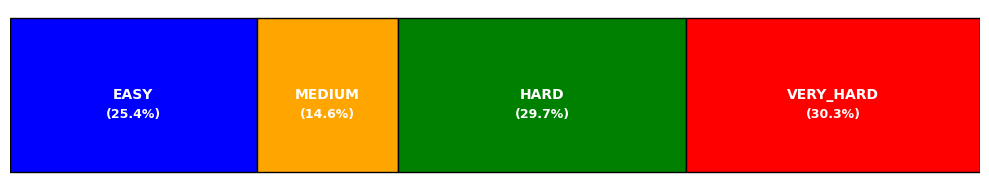

In [ ]:
mask_valid = df["difficulty"].isin(valid_difficulties)
num_valid = mask_valid.sum()
num_total = len(df)
num_unknown = num_total - num_valid

percent_valid = 100 * num_valid / num_total
percent_invalid = 100 * num_unknown / num_total

print(f"Examples with valid difficulty: {num_valid} ({percent_valid}%)")
print(f"Examples with unknown difficulty: {num_unknown} ({percent_invalid}%)")

difficulty_counts = Counter(df[mask_valid]["difficulty"])
total = sum(difficulty_counts.values())

percentages = {k: round(100 * v / total, 2) for k, v in difficulty_counts.items()}


labels = sorted(list(percentages.keys()), key=lambda x: valid_difficulties.index(x))

values = [percentages[k] for k in labels]

colors = {'EASY': 'blue', 'MEDIUM': 'orange', 'HARD': 'green', 'VERY_HARD': 'red'}
bar_colors = [colors[k] for k in labels]

fig, ax = plt.subplots(figsize=(10, 2))
start = 0
for value, color, label in zip(values, bar_colors, labels):
    ax.barh(0, value, left=start, color=color, edgecolor='black')
    ax.text(start + value / 2, 0, label.upper(), va='center', ha='center', color='white', fontsize=10, weight='bold')
    ax.text(start + value / 2, -0.1, f"({value:.1f}%)", va='center', ha='center', color='white', fontsize=9, weight='bold')

    start += value

ax.set_xlim(0, 100)
ax.axis('off')
plt.tight_layout()
plt.show()

# plot them as rectangle

In this sample more than 50% of the problems (with valid difficulty) are difficult, great training exercise for our LLM!

Average Input Length: 316.22
Average Output Length: 5162.06


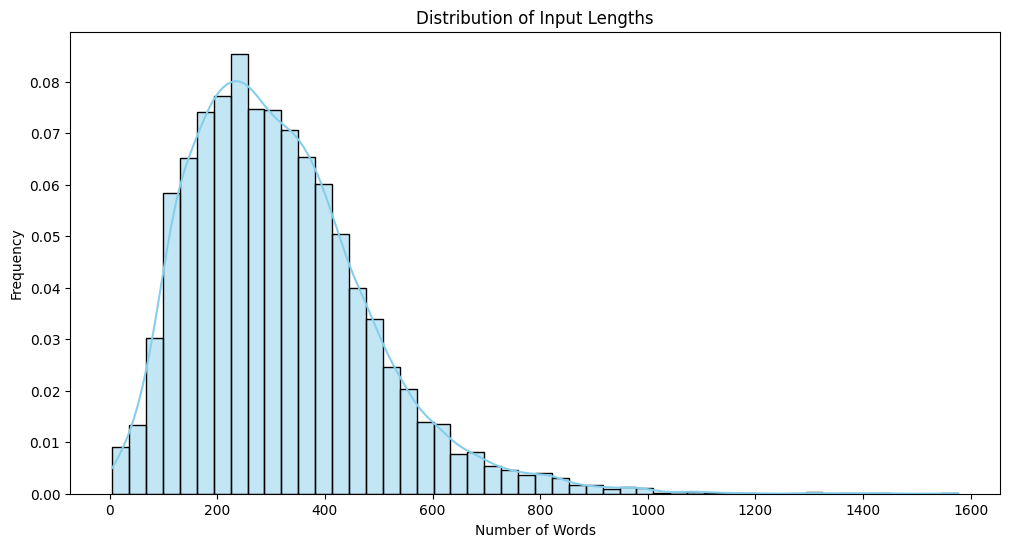

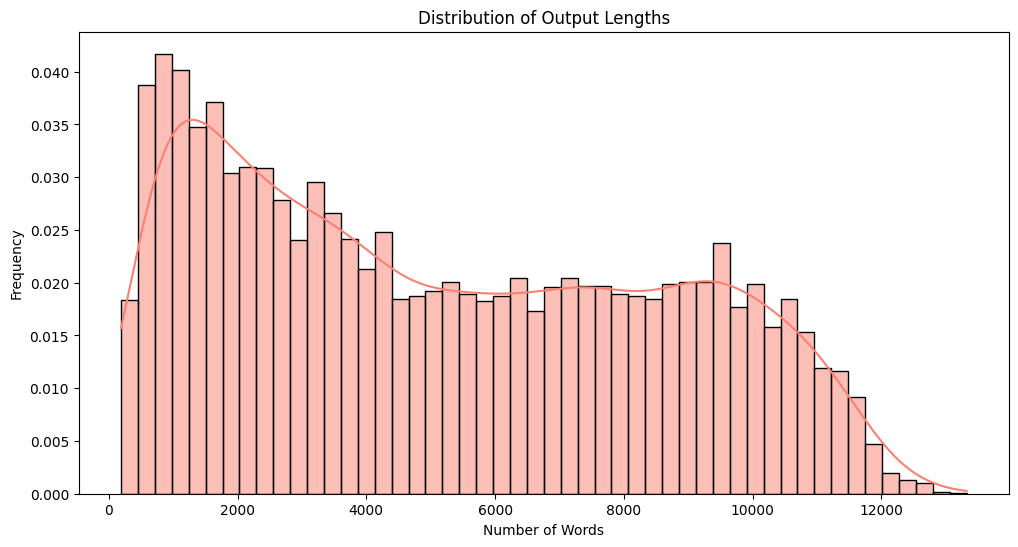

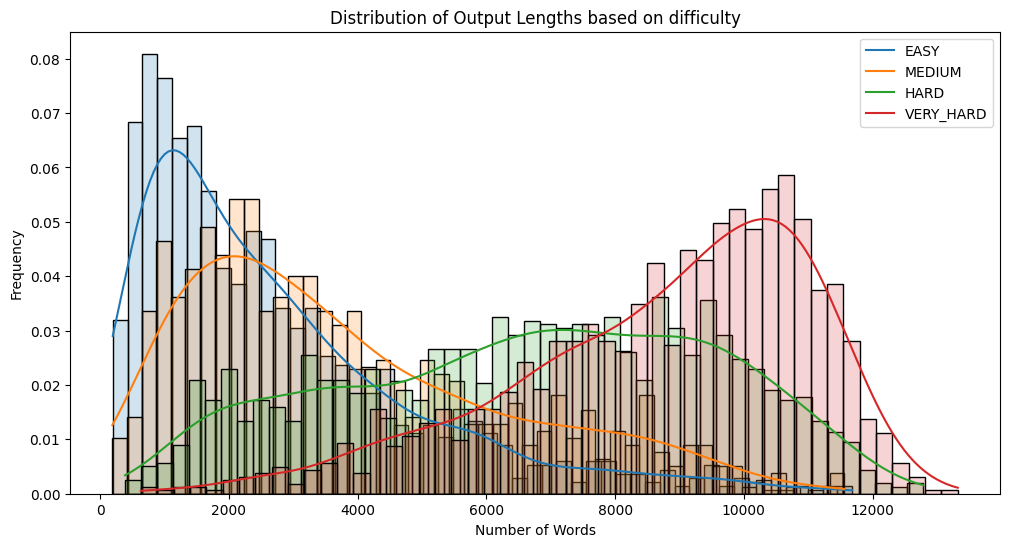

In [ ]:
input_word_len = df['input'].apply(lambda x: len(x.split()))
output_word_len = df['output'].apply(lambda x: len(x.split()))

df['output_word_len'] = output_word_len

print(f"Average Input Length: {input_word_len.mean():.2f}")
print(f"Average Output Length: {output_word_len.mean():.2f}")

plt.figure(figsize=(12, 6))

sns.histplot(input_word_len, bins=50, kde=True, color='skyblue', stat="proportion")
plt.title('Distribution of Input Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 6))
plt.title('Distribution of Output Lengths')
sns.histplot(output_word_len, bins=50, kde=True, color='salmon', stat="proportion")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
for difficulty in ["EASY", "MEDIUM", "HARD", "VERY_HARD"]:
    difficulty_df = df[df['difficulty'] == difficulty]
    difficulty_output_word_len = difficulty_df['output_word_len']
    sns.histplot(difficulty_output_word_len, bins=50, kde=True, stat="proportion", alpha=0.2)

plt.title('Distribution of Output Lengths based on difficulty')
plt.legend(["EASY", "MEDIUM", "HARD", "VERY_HARD"])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()

# Free ram
del input_word_len
del output_word_len

These plots show the distribution of the number of words utilized to describe the problem (input) and find a solution (output, composed of reasoning + actual solution).

The input set seems to follow a gaussian distribution with an average of 250 words, but the output strangely doesn't have the same shape.

The explanation behind it is that the output length depends on the difficulty of the problems: harder problems need more reasoning before settling to a solution and therefore the LLM needs to spend more time understanding th mechanism of the problems.

By looking at the output distribution for each difficulty, the difference between problems is more evident.




Average Unique Words per Problem Statement: 150.32
Average Unique Words per Solution: 876.56


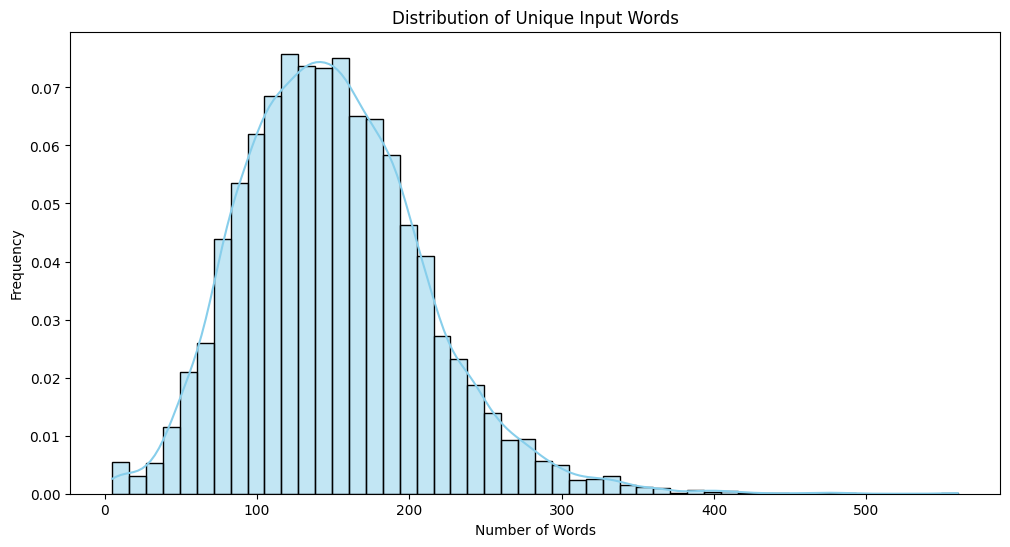

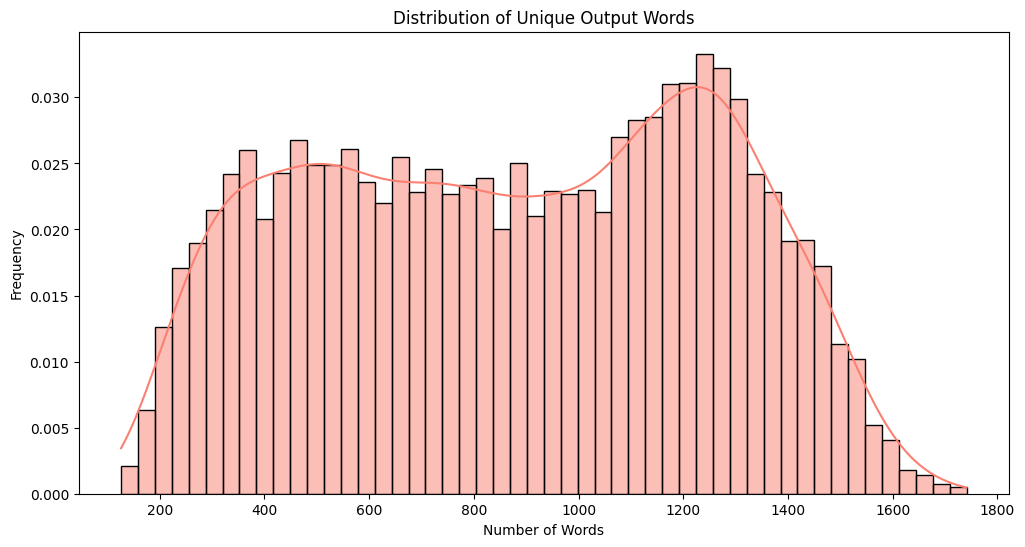

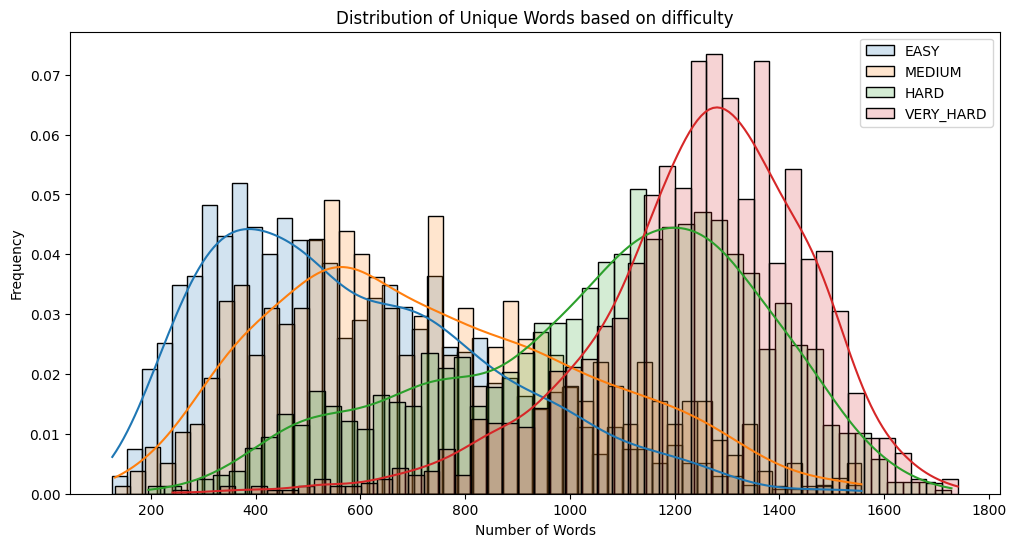

In [ ]:
input_words = df['input'].str.split().explode()
output_words = df['output'].str.split().explode()



def vocab_per_doc(df, col):
    return df[col].apply(lambda x: len(set(x.split())))

input_vocab_per_doc = vocab_per_doc(df, 'input')
output_vocab_per_doc = vocab_per_doc(df, 'output')

print(f"\nAverage Unique Words per Problem Statement: {input_vocab_per_doc.mean():.2f}")
print(f"Average Unique Words per Solution: {output_vocab_per_doc.mean():.2f}")

plt.figure(figsize=(12, 6))

sns.histplot(input_vocab_per_doc, bins=50, kde=True, color='skyblue', stat="proportion")
plt.title('Distribution of Unique Input Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(output_vocab_per_doc, bins=50, kde=True, color='salmon', stat="proportion")
plt.title('Distribution of Unique Output Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

del input_vocab_per_doc
del output_vocab_per_doc

plt.figure(figsize=(12, 6))
for difficulty in ["EASY", "MEDIUM", "HARD", "VERY_HARD"]:
    difficulty_df = df[df['difficulty'] == difficulty]
    difficulty_output_vocab_per_doc = vocab_per_doc(difficulty_df, 'output')
    sns.histplot(difficulty_output_vocab_per_doc, bins=50, kde=True, stat="proportion", alpha=0.2, label=difficulty)

plt.title('Distribution of Unique Words based on difficulty')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# To free ram
del input_words
del output_words

The number of unique words inside each doc is much correlated to the length of it, as a longer document has more probability of having more unique words. Therefore the insights are the same as before: the input docs follow a gaussian distribution, while the output is composed of different distributions for each difficulty

Average Code Ratio: 2.92%


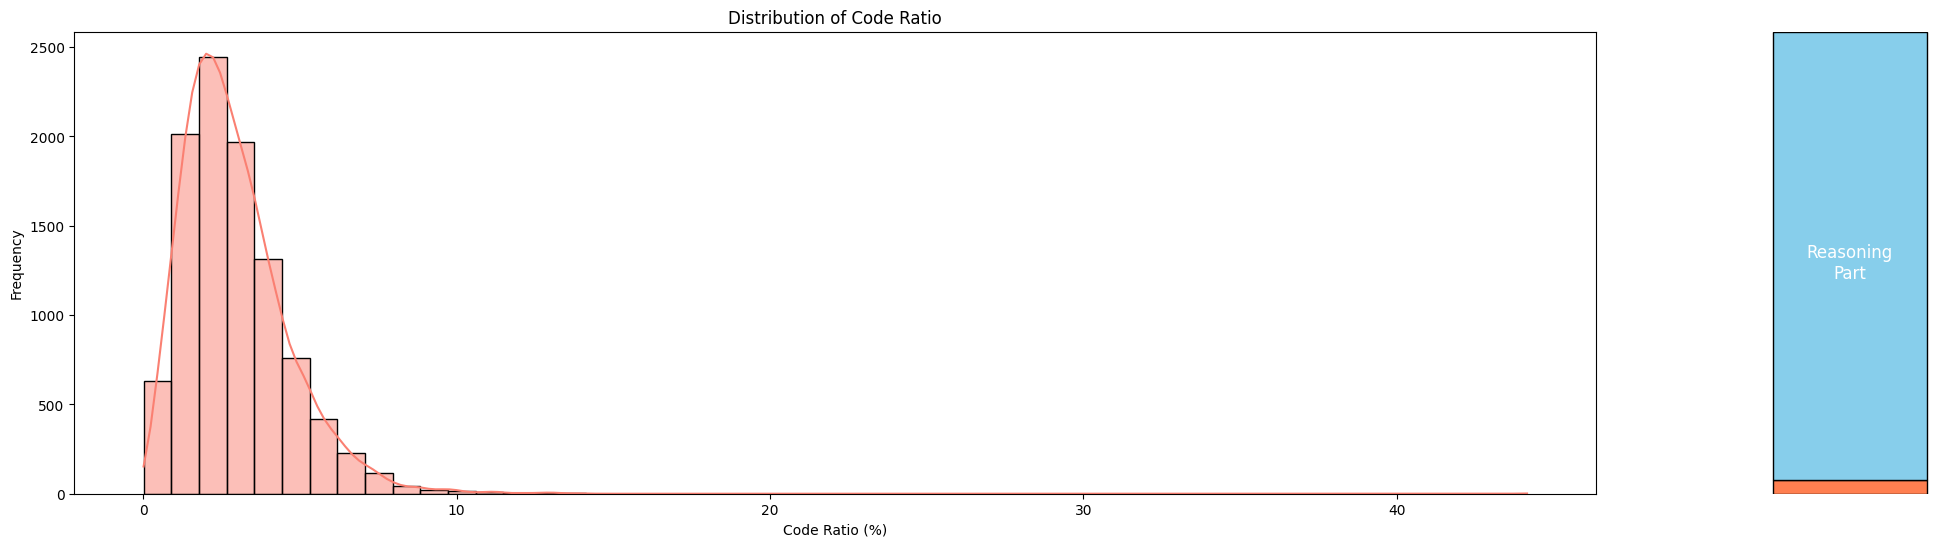

In [ ]:
think_pattern = r"<think>(.*?)</think>"
code_pattern = r'```python(.*?)```'

think_lengths = []
code_lengths = []

for output in df['output']:
    think_match = re.search(think_pattern, output, re.DOTALL)
    think_length = len(think_match.group(1).split()) if think_match else 0
    think_lengths.append(think_length)

    code_match = re.search(code_pattern, output, re.DOTALL)
    code_length = len(code_match.group(1).split()) if code_match else 0
    code_lengths.append(code_length)


code_ratio = [100*c / (c+t) if t > 0 else float('inf') for c, t in zip(code_lengths, think_lengths)]

code_ratio_avg = np.mean(code_ratio)
think_ratio_avg = 100 - code_ratio_avg

print(f"Average Code Ratio: {code_ratio_avg:.2f}%")


fig, axs = plt.subplots(1, 2, figsize=(24, 6), gridspec_kw={'width_ratios': [9, 1]})


sns.histplot(code_ratio, bins=50, kde=True, color='salmon', ax=axs[0])
axs[0].set_title('Distribution of Code Ratio')
axs[0].set_xlabel('Code Ratio (%)')
axs[0].set_ylabel('Frequency')


axs[1].bar(0, code_ratio_avg, color='coral', edgecolor='black', width=2)
axs[1].bar(0, think_ratio_avg, bottom=code_ratio_avg, color='skyblue', edgecolor='black', width=2)

axs[1].text(0, 50, 'Reasoning\nPart', va='center', ha='center', color='white', fontsize=12)

axs[1].set_ylim(0, 100)
axs[1].axis('off')

plt.show()


# help ram
del think_lengths
del code_lengths
del code_ratio

As we can see the reasoning part in the output samples take part of most of the solution. 99% of the data points have a ratio below 10%, while the average is less than 3%

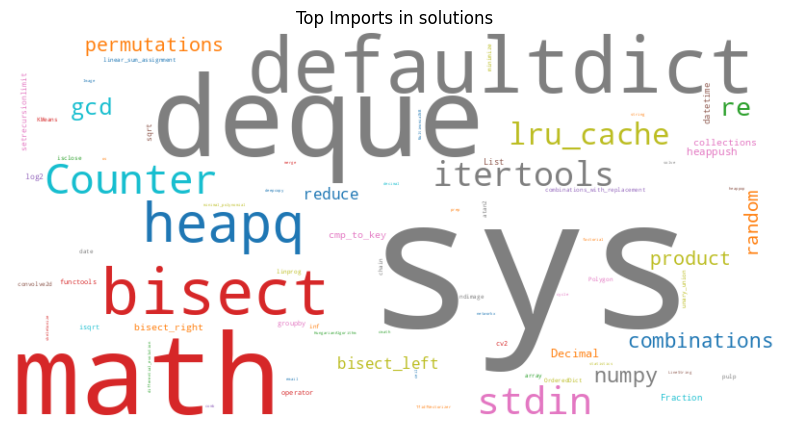

In [ ]:

imports = df["solution"].dropna().apply(lambda x: re.findall(r"import\s+\w+", x))
import_freq = Counter([imp.split()[-1] for sub in imports for imp in sub])
top_imports = dict(import_freq)

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(top_imports)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Imports in solutions")
plt.show()


By looking at the wordcloud it seems the biggest used imports are:
* **sys**: to manage io files
* **math**: for complex math operations
* **data structures** like (deque, heapq, ...): to get optimal solutions with efficient data structures

### Indexing

Given the large OpenCodeReasoning dataset, we can build a searchable engine to find specific types of problems to train for such and crack the coding interview!

We are going to use **pyterrier** to index the documents

In [ ]:
# Restructure for pyterrier format
index_df = pd.DataFrame()

index_df["docno"] = df["id"]
index_df["text"] = (
    "Input:\n" + df["input"] +
    "\n\nOutput:\n" + df["output"] +
    "\n\nDifficulty:\n" + df["difficulty"].astype(str)
)

In [ ]:
indexer = pt.DFIndexer("./index_code", overwrite=True)
index_ref = indexer.index(index_df["text"], index_df["docno"])
index_ref.toString()

<ipython-input-20-f325d15284e6>:1: DeprecationWarning: Call to deprecated class DFIndexer. (use pt.terrier.IterDictIndexer().index(dataframe.to_dict(orient='records')) instead) -- Deprecated since version 0.11.0.
  indexer = pt.DFIndexer("./index_code", overwrite=True)


'./index_code/data.properties'

In [ ]:
index = pt.IndexFactory.of(index_ref)

In [ ]:
print(index.getCollectionStatistics().toString())

Number of documents: 10000
Number of terms: 31252
Number of postings: 2274930
Number of fields: 0
Number of tokens: 19209908
Field names: []
Positions:   false



In [ ]:
def find_problem(query):

  br = pt.terrier.Retriever(index, wmodel="TF_IDF")
  docno =  br.search(query).iloc[0]["docno"]

  return df[df["id"] == docno]["input"].iloc[0], df[df["id"] == docno]["solution"].iloc[0], df[df["id"] == docno]["difficulty"].iloc[0]

In [ ]:
# @title Find the problem you want!
query = "hard dynamic programming problem" # @param{type:"string"}

problem, sol, difficulty = find_problem(query)

print("Problem:")
print(problem)
print("\nSolution:")
print(sol)
print("\nDifficulty:")
print(difficulty)


Problem:
Scott Lang is at war with Darren Cross. There are n chairs in a hall where they are, numbered with 1, 2, ..., n from left to right. The i-th chair is located at coordinate xi. Scott is on chair number s and Cross is on chair number e. Scott can jump to all other chairs (not only neighboring chairs). He wants to start at his position (chair number s), visit each chair exactly once and end up on chair number e with Cross. 

As we all know, Scott can shrink or grow big (grow big only to his normal size), so at any moment of time he can be either small or large (normal). The thing is, he can only shrink or grow big while being on a chair (not in the air while jumping to another chair). Jumping takes time, but shrinking and growing big takes no time. Jumping from chair number i to chair number j takes |xi - xj| seconds. Also, jumping off a chair and landing on a chair takes extra amount of time. 

If Scott wants to jump to a chair on his left, he can only be small, and if he wants 

### Topic Modeling

What do the problems talk about? What are the main topics talked about in this dataset? Let's use **BERTopic**, a topic modeling technique that leverages transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics.

In [ ]:
# To induce topics (doesn't actually create them)
seed_topic_list = [
    ["array", "subarray", "index", "element", "list"],                     # Array
    ["string", "substring", "character", "palindrome", "anagram"],         # String
    ["hash", "hashmap", "dictionary", "key", "value"],                     # Hash Table
    ["dp", "dynamic programming", "state", "transition", "memoization"],   # Dynamic Programming
    ["math", "gcd", "lcm", "prime", "factorial", "modulo"],                 # Math
    ["sort", "sorted", "ascending", "descending", "merge sort", "quick sort"], # Sorting
    ["greedy", "optimal", "choice", "maximize", "minimize"],                # Greedy
    ["search", "linear search", "lookup", "find", "explore"],               # Search
    ["binary search", "midpoint", "sorted array", "left", "right"],         # Binary Search
    ["database", "query", "sql", "select", "table"],                        # Database
    ["matrix", "2D array", "row", "column", "grid"],                        # Matrix
    ["tree", "binary tree", "node", "root", "leaf"],                        # Tree
    ["heap", "priority queue", "min heap", "max heap"],                     # Heap
    ["simulation", "simulate", "state change", "process"],                 # Simulation
    ["stack", "push", "pop", "last in first out", "lifo"],                  # Stack
    ["counting", "count", "frequency", "occurrence", "combinations"],       # Counting
    ["graph", "node", "edge", "adjacency", "undirected", "directed"],        # Graph
    ["design", "class", "object", "system", "architecture"],                # Design
    ["trie", "prefix tree", "insert", "search word", "starts with"],         # Trie
    ["combinatorics", "combination", "permutation", "arrangement", "selection"], # Combinatorics
    ["bitmask", "bitwise", "mask", "binary", "or", "and"],                  # Bitmask
    ["queue", "enqueue", "dequeue", "first in first out", "fifo"],           # Queue
    ["recursion", "recursive", "base case", "call stack"],                  # Recursion
    ["divide and conquer", "split", "merge", "divide", "combine"],           # Divide and Conquer
    ["shortest path", "dijkstra", "bellman-ford", "pathfinding", "graph"],   # Shortest Path
    ["iterator", "iteration", "next element", "collection", "traversal"],    # Iterator
    ["probability", "statistics", "expected value", "variance", "distribution"], # Probability and Statistics
    ["shell", "bash", "command line", "script", "terminal"]                 # Shell
]

# To avoid stopwords
vectorizer_model = CountVectorizer(stop_words="english")
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)


We trained the model on the output column, as the input doesn't usually explain how to solve the problem, while in the reasoning part the algorithms / data structures used are explained.


In [ ]:
# Download at the following link https://polimi365-my.sharepoint.com/:f:/g/personal/10804856_polimi_it/Erht2rCUcwtGlD2XIX3EF3MBfh9MVCjRwz52HPjKnqL2SA?e=oUk45e
topic_model = BERTopic.load("topic_model")

# # Generate topics (takes time)
# topic_model = BERTopic(vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model, seed_topic_list=seed_topic_list, nr_topics=15)
# topics, probs = topic_model.fit_transform(sample_dataset["output"])

# # low memory option
# vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english", min_df=10)
# topic_model = BERTopic(vectorizer_model=vectorizer_model, low_memory=True)
# topics, probs = topic_model.fit_transform(dataset["output"])

2025-05-23 09:15:00,105 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


In [ ]:
# Get topic information
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,4131,-1_list_node_count_sum,outliers,"[list, node, count, sum, edge, right, wait, po...",NaN
1,0,1942,0_state_list_player_edge,path,"[state, list, player, edge, path, possible, st...",NaN
2,1,1174,1_array_element_elements_permutation,array,"[array, element, elements, permutation, subarr...",NaN
3,2,761,2_string_character_palindrome_characters,string,"[string, character, palindrome, characters, su...",NaN
4,3,575,3_row_column_points_rows,matrix,"[row, column, points, rows, columns, grid, cel...",NaN
5,4,521,4_node_tree_root_nodes,graph,"[node, tree, root, nodes, edge, edges, graph, ...",NaN
6,5,358,5_prime_gcd_primes_sieve,primes,"[prime, gcd, primes, sieve, divisors, lcm, fac...",NaN
7,6,333,6_digits_digit_numbers_carry,digits,"[digits, digit, numbers, carry, 19, zeros, num...",NaN
8,7,56,7_line_matrix_lines_axis,io,"[line, matrix, lines, axis, print, program, in...",NaN
9,8,39,8_minutes_month_year_date,datetime,"[minutes, month, year, date, hours, birth, sec...",NaN


The model found 15 topics:
* the topic -1 contains the outliers, problems that didn't fit any of the found topics
* the biggest topics found were about **path** finding, **array** and **string** manipulation problems
* the last topic groups contained a low number of documents, so the topics are a more specific, like **image processing** and **sets**

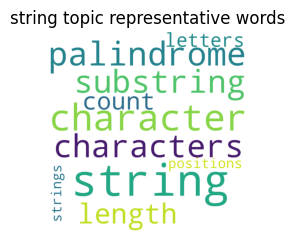

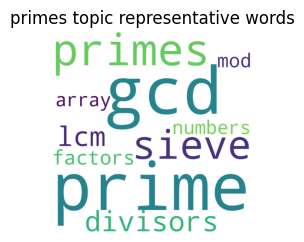

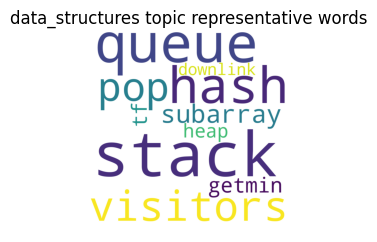

In [ ]:
def display_topic(topic_model, index):
    data = topic_model.get_topic(index)
    custom_label = topic_model.custom_labels_[index+1]


    # Create a dictionary from the list of lists
    word_freq = dict(data)

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate_from_frequencies(word_freq)

    plt.figure(figsize = (2, 2), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"{custom_label} topic representative words")
    plt.show()

# Examples of topics
display_topic(topic_model, 2)
display_topic(topic_model, 5)
display_topic(topic_model, 10)


Here you can see some examples of the most important words that define the topics; as expected all of them contain some specific keywords to the topic (ex: queue and stack in data_structures, gcd and lcm for primes, palindrome and substring for strings topics)

In [ ]:
topic_model.visualize_barchart(custom_labels=True)

This plot shows how the most important words inside each topic are scored, therefore if documents contain them they will have a higher probability to finish inside their topics.

In [ ]:
topic_model.visualize_topics()

This plot shows the intertopic distances on a reduced dimension. it shows some interesting characteristics:

* the **string** and **digits** topics are close, as the manipulation of these data types in problems are similar
* the **datetime** problems are totally different to any other problem
* the **path** topics are relatively close to the **data_structures** one, as in most of those problems structures like queues or stacks are used.
